In [183]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np


In [4]:
ert_quakes = pd.read_csv('data/earthquakes.csv')
ert_quakes

,mag,magType,time,place,tsunami,parsed_place
0,1.35,ml,1539475168010,"9km NE of Aguanga, CA",0,California
1,1.29,ml,1539475129610,"9km NE of Aguanga, CA",0,California
2,3.42,ml,1539475062610,"8km NE of Aguanga, CA",0,California
3,0.44,ml,1539474978070,"9km NE of Aguanga, CA",0,California
4,2.16,md,1539474716050,"10km NW of Avenal, CA",0,California
...,...,...,...,...,...,...
9327,0.62,md,1537230228060,"9km ENE of Mammoth Lakes, CA",0,California
9328,1.00,ml,1537230135130,"3km W of Julian, CA",0,California
9329,2.40,md,1537229908180,"35km NNE of Hatillo, Puerto Rico",0,Puerto Rico
9330,1.10,ml,1537229545350,"9km NE of Aguanga, CA",0,California


In [5]:
quakes.query('magType == "mb"')[['mag','tsunami']]

,mag,tsunami
mag,1.000000,0.448921
tsunami,0.448921,1.000000


Text(0.5, 1.0, 'Correlation between earthquake magnitude and whether there was a tsunami')

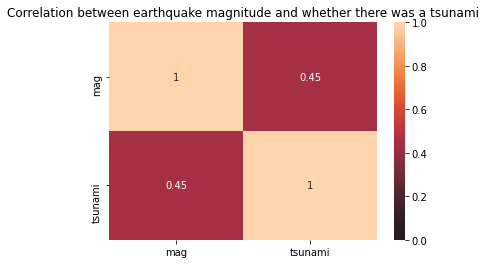

In [88]:
# Exercise 1

mb_only = quakes.query('magType == "mb"')
corr= mb_only.iloc[:,[True, False, False, False, True, False]].corr()
sb.heatmap(corr,annot=True, center=0, vmin=0, vmax=1 )
plt.title('Correlation between earthquake magnitude and whether there was a tsunami')


In [91]:
fb = pd.read_csv('data/fb_stock_prices_2018.csv', index_col='date', parse_dates=True)

cols = ['volume', 'close']
subset = fb[cols]

quantiles = subset.quantile([0.25, 0.75])
quantiles.loc['iqr',:] = quantiles.loc[0.75,:] - quantiles.loc[0.25,:]
quantiles

,volume,close
0.25,17828394.0,157.915
0.75,30313840.0,185.270
iqr,12485446.0,27.355


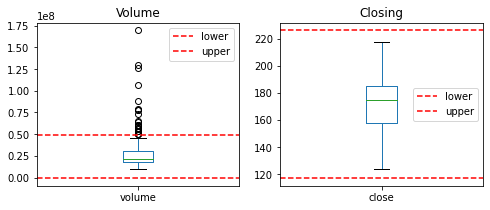

In [157]:
quartile_3 = np.quantile(fb[['close']], 0.25)


Q1 = np.percentile(fb[['volume','close']], 25, axis=0) 
Q3 = np.percentile(fb[['volume','close']], 75, axis=0) 
IQR = Q3 - Q1
IQR

numpy_data = np.array([Q1, Q3, IQR])

df = pd.DataFrame(data=numpy_data, index=["Q1", "Q3", "IQR"], columns=["volume", "close"])
axe1, axe2 = subset.plot(kind='box', subplots=True, figsize=(8, 3), title=['Volume', 'Closing'])


# axes for Volume

lower_bound = df.loc['Q1', 'volume'] - (df.loc['IQR', 'volume'] * 1.5)
upper_bound = df.loc['Q3', 'volume'] + (df.loc['IQR', 'volume'] * 1.5)

# axes for Close
lower_bound_close = df.loc['Q1', 'close'] - (df.loc['IQR', 'close'] * 1.5)
upper_bound_close = df.loc['Q3', 'close'] + (df.loc['IQR', 'close'] * 1.5)

axe1.axhline(
            [lower_bound], 
            color='red', 
            linestyle='dashed',
            label='lower'
        )

axe1.axhline(
            [upper_bound], 
            color='red', 
            linestyle='dashed',
            label='upper'
        )

axe2.axhline(
            [lower_bound_close], 
            color='red', 
            linestyle='dashed',
            label='lower'
        )

axe2.axhline(
            [upper_bound_close], 
            color='red', 
            linestyle='dashed',
            label='upper'
        )
axe1.legend()
axe2.legend()


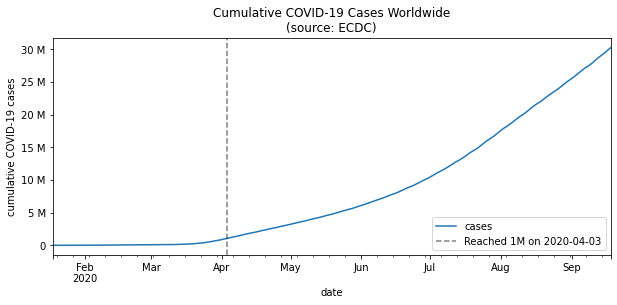

In [168]:
from matplotlib.ticker import EngFormatter
covid = pd.read_csv('data/covid19_cases.csv').assign(
    date=lambda x: pd.to_datetime(x.dateRep, format='%d/%m/%Y')
).set_index('date').replace(
    'United_States_of_America', 'USA'
).sort_index()['2020-01-18':'2020-09-18']


cumulative_cases = covid.groupby(pd.Grouper(freq='1D')).sum().cases.cumsum()

ax = cumulative_cases.plot(title='Cumulative COVID-19 Cases Worldwide\n(source: ECDC)', figsize=(10, 4))
ax.set_ylabel('cumulative COVID-19 cases')
ax.yaxis.set_major_formatter(EngFormatter())

over_1M = cumulative_cases[cumulative_cases >= 1e6].index[0]
ax.axvline(over_1M, linestyle='dashed', color='k', alpha=0.5, label=f"Reached 1M on {over_1M.strftime('%Y-%m-%d')}")

ax.legend()

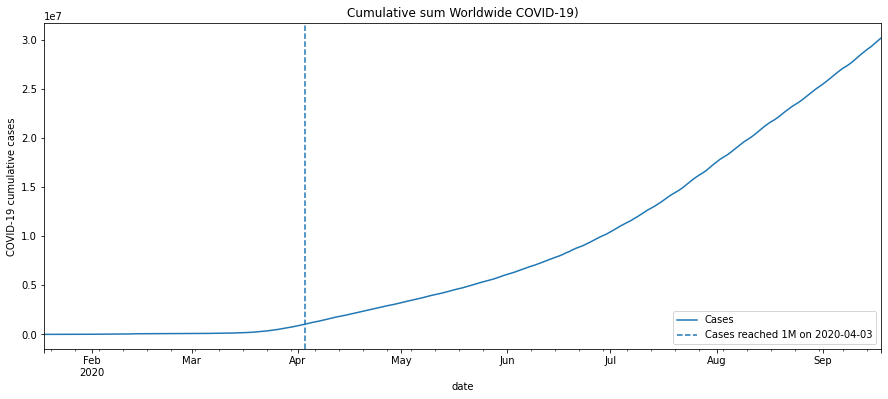

In [198]:
everyday_cases = covid.reset_index().pivot(
    index='date', columns='countriesAndTerritories', values='cases'
).fillna(0)

cum_sum = everyday_cases.apply('sum', axis=1).cumsum()
ax = cum_sum.plot(title='Cumulative sum Worldwide COVID-19)', figsize=(15, 6))
ax.set_ylabel('COVID-19 cumulative cases')


o_1mill = cumulative_cases[cumulative_cases >= 1e6].index[0]

ax.axvline(o_1mill, linestyle='--')

ax.legend(["Cases", f"Cases reached 1M on {o_1mill.date()}"], loc ="lower right")


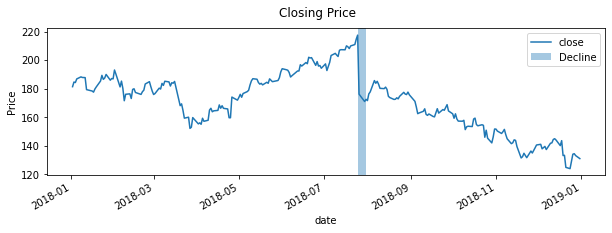

In [202]:
#  Exercise 4

fb.close.plot(kind='line', figsize=(10, 3))
plt.axvspan(
    '2018-07-25', '2018-07-31', alpha=0.4, label='Decline',
)
plt.ylabel('Price')
plt.suptitle('Closing Price')
plt.legend()

Text(2019-01-21, 168.15, 'FTC launches investigation')

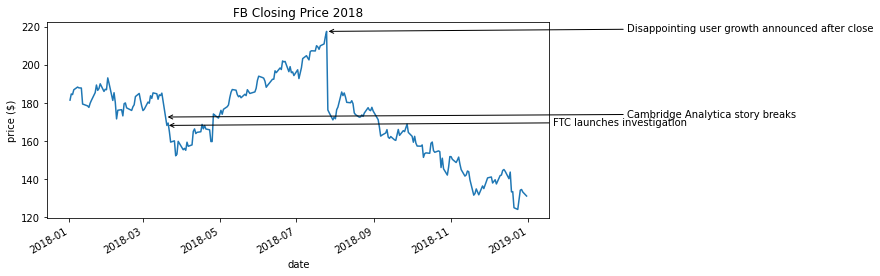

In [234]:
# #  Exercise 5


ax = fb.close.plot(title='FB Closing Price 2018', figsize=(9, 4))
ax.set_ylabel('price ($)')

xytext_ann1 = fb.close['2018-07-25']
xytext_ann2 = fb.close['2018-03-19']
xytext_ann3 = fb.close['2018-03-20']

plt.annotate(
    'Disappointing user growth announced after close',
    xy=('2018-07-25', xytext_ann1),
    xytext=('2019-03-21', xytext_ann1),
    arrowprops={'arrowstyle': '->'}
)

plt.annotate(
    'Cambridge Analytica story breaks',
    xy=('2018-03-19', xytext_ann2),
    xytext=('2019-03-21', xytext_ann2),
    arrowprops={'arrowstyle': '->'}
)

plt.annotate(
    'FTC launches investigation',
    xy=('2018-03-20', xytext_ann3),
    xytext=('2019-01-21', xytext_ann3),
    arrowprops={'arrowstyle': '->'}
)


[<AxesSubplot:xlabel='close', ylabel='volume'>,
 <AxesSubplot:xlabel='close', ylabel='residuals'>,
 <AxesSubplot:xlabel='volume', ylabel='close'>,
 <AxesSubplot:xlabel='volume', ylabel='residuals'>]

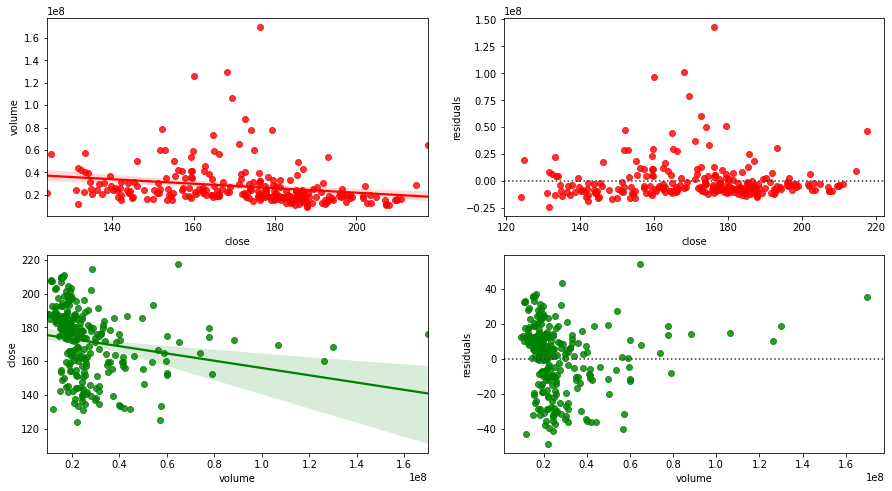

In [239]:
#  Exercise 6
import itertools
def reg_resid_plots(data):
    """
    Using `seaborn`, plot the regression and residuals plots
    side-by-side for every permutation of 2 columns in the data.
    
    Parameters:
        - data: A `pandas.DataFrame`

    Returns:
        A matplotlib `Axes` object.
    """
    num_cols = data.shape[1]
    permutation_count = num_cols * (num_cols - 1)

    fig, ax = plt.subplots(permutation_count, 2, figsize=(15, 8))

    for (x, y), axes, color in zip(
        itertools.permutations(data.columns, 2), 
        ax,
        itertools.cycle(['red', 'green'])
    ):
        for subplot, func in zip(axes, (sns.regplot, sns.residplot)):
            func(x=x, y=y, data=data, ax=subplot, color=color)

            if func == sns.residplot:
                # mark the residuals as such
                subplot.set_ylabel('residuals')
    return fig.axes




reg_resid_plots(fb[['close','volume']])

